# CogSci 138 Lab 1: Ebbinghaus illusion and psychophysical measurement methods

In this lab we will look at the classic Ebbinghaus illusion, in which two red circles, each flanked by a ring of black circles, are presented and the observer is asked to indicate which central red circle is bigger (left or right)? The ring of flanking circles affects our perception, leading to an illusion. You can learn more about this illusion here: https://www.illusionsindex.org/i/ebbinghaus-illusion

In this lab you will learn:
1. What is the Ebbinghaus illusion?
2. What parameters control the illusion's strength?
3. How to measure it using the Method of Adjustment
4. How to measure it using the Method of Constant Stimuli
5. How to estimate the Point of Subjective Equality (PSE) and Just Noticeable Difference (JND)
6. How PSE and JND vary as a function of illusion strength

## 0. Set up packages and global parameters
We'll use Pyllusion, the lightweight and useful package for rendering classic optical illusions. Learn about the available illusions here: https://github.com/RealityBending/Pyllusion

In [1]:
!pip install pyllusion

  Using cached pyllusion-1.3-py2.py3-none-any.whl.metadata (19 kB)
Using cached pyllusion-1.3-py2.py3-none-any.whl (86 kB)


In [2]:
# imports & set up
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import pyllusion_lab

In [3]:
# global parameters
illusion_type = 'Ebbinghaus'
lab = "lab1"
standard = 0.15 # the fixed size of the central circle of the standard stimulus (pyllusion calls this size_min) 
differences=[-3, -2, -1, 0, 1, 2, 3] # the size differences of the central red circles
illusion_strengths = [-6, -3, 0, 3, 6]
output_data_path = '../expt_results/' + lab + '/'
prerendered_stimuli_dir = output_data_path + "pre_rendered_stimuli/"
if os.path.exists(output_data_path) == False:
    os.makedirs(output_data_path)

## 1. Pyllusion and the Ebbinghaus illusion
In Pyllusion's implementation of the Ebbinghaus illusion there are two main parameters that will affect if you perceive it:
1. difference (the actual difference of the two circle sizes)
2. illusion_strength (size of the flanking circles)

In [4]:
stimuli_df = pyllusion_lab.pre_render_stimuli(illusion_type, illusion_strengths=illusion_strengths, standard=standard, differences=differences, prerendered_stimuli_dir=prerendered_stimuli_dir);
stimuli_df.head()

35 of the right stimuli already exist, not rendering more


,illusion_type,illusion_strength,standard,difference,size1,size2,standard1,image_path
0,Ebbinghaus,-6,0.15,-3,0.150000,0.300000,True,../expt_results/lab1/pre_rendered_stimuli/Ebbi...
1,Ebbinghaus,-6,0.15,-2,0.150000,0.259808,True,../expt_results/lab1/pre_rendered_stimuli/Ebbi...
2,Ebbinghaus,-6,0.15,-1,0.150000,0.212132,True,../expt_results/lab1/pre_rendered_stimuli/Ebbi...
3,Ebbinghaus,-6,0.15,0,0.150000,0.150000,True,../expt_results/lab1/pre_rendered_stimuli/Ebbi...
4,Ebbinghaus,-6,0.15,1,0.212132,0.150000,False,../expt_results/lab1/pre_rendered_stimuli/Ebbi...


In the next example you will see what it means to vary the illusion strength, while keeping the difference between the left and right central circles at zero. Even though the red circles are always the same size, do you see that sometimes the left and right circles appear to be different size, especially when the illusion strength is high?

Ebbinghaus illusion with 5 different illusion strengths


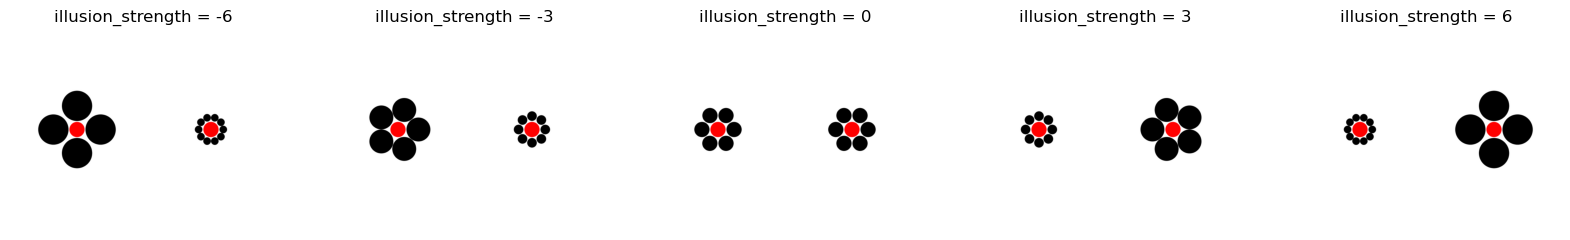

In [5]:
difference = 0
plt.figure(figsize=(20,5))
for i,illusion_strength in enumerate(illusion_strengths, start=1): 
    plt.subplot(1,len(illusion_strengths),i)
    stimulus_img, stimulus_params = pyllusion_lab.load_prerendered_stimulus(stimuli_df, illusion_type, \
                                                                            illusion_strength=illusion_strength, \
                                                                            difference=difference, \
                                                                            standard=standard)
    plt.imshow(stimulus_img)
    plt.axis('off')
    plt.title(f"illusion_strength = {illusion_strength}")
print(f"{illusion_type} illusion with {len(illusion_strengths)} different illusion strengths") 

In the next example you will see what it means to vary the difference between the central circles, while keeping the illusion strength fixed at 0. When the illusion strength is zero, the illusion doesn't usually occur: You should be able to accurately tell which central circle is bigger.

Ebbinghaus illusion with illusion strength = 0 and 7 different relative sizes


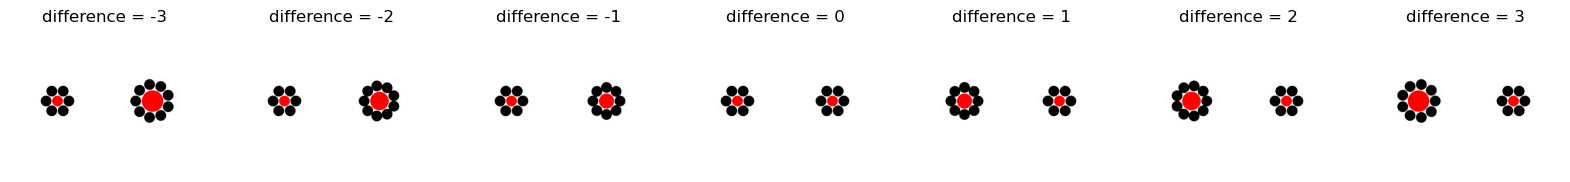

In [6]:
illusion_strength = 0
plt.figure(figsize=(20,5))
for i,delta in enumerate(differences, start=1): 
    plt.subplot(1,len(differences),i)
    stimulus_img, stimulus_params = pyllusion_lab.load_prerendered_stimulus(stimuli_df, illusion_type, \
                                                                            illusion_strength=illusion_strength, \
                                                                            difference=delta, \
                                                                            standard=standard)
    plt.imshow(stimulus_img)
    plt.axis('off')
    plt.title(f"difference = {delta}")
print(f"{illusion_type} illusion with illusion strength = 0 and {len(differences)} different relative sizes")

Putting it all together, now we can make a nifty table of changing the illusion strength and the relative size:

Ebbinghaus illusion with various illusion strengths and and relative sizes.
When difference (Δ) is 0 (middle column), any apparent size difference is illusory
When difference (Δ) is not zero (all the other columns), seeing the two central circles as the same size is illusory


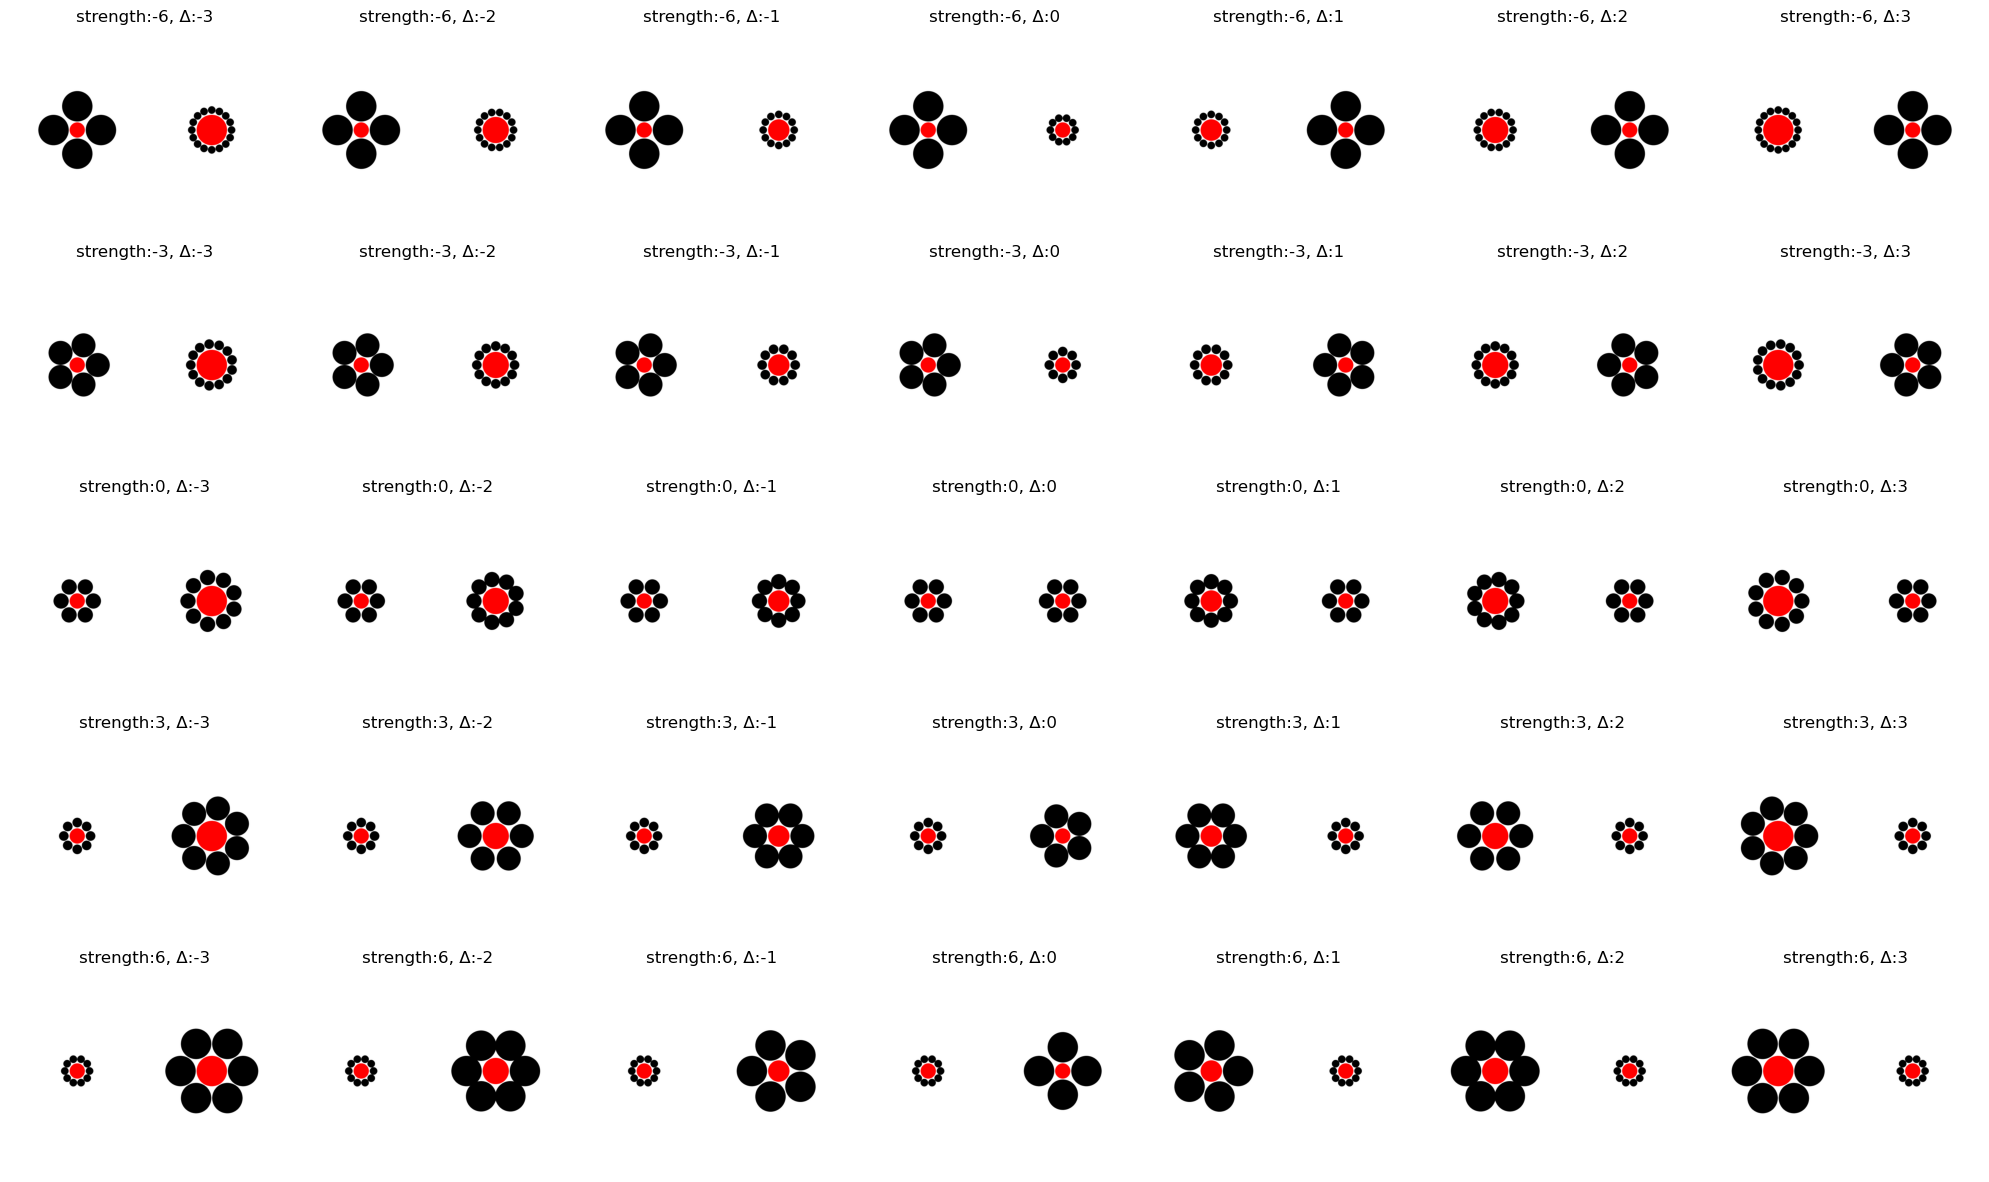

In [7]:
plt.figure(figsize=(20,12))
for i,illusion_strength in enumerate(illusion_strengths, start=0): 
    for j,delta in enumerate(differences, start=1): 
        plt.subplot(len(illusion_strengths),len(differences),i*len(differences)+j)
        stimulus_img, stimulus_params = pyllusion_lab.load_prerendered_stimulus(stimuli_df, illusion_type, \
                                                                            illusion_strength=illusion_strength, \
                                                                            difference=delta, \
                                                                            standard=standard)
        plt.imshow(stimulus_img)
        plt.axis('off')
        plt.title(f"strength:{illusion_strength}, Δ:{delta}")
plt.tight_layout()
print(f"{illusion_type} illusion with various illusion strengths and and relative sizes.")
print("When difference (Δ) is 0 (middle column), any apparent size difference is illusory")
print("When difference (Δ) is not zero (all the other columns), seeing the two central circles as the same size is illusory")

## 2. Method of Adjustment
Now that you know the scope of this stimulus, let's quantify your perception of this illusion using the simplest of quantitative measurement techniques: The method of adjustment. The slider will adjust the relative size of central circle. It may react a bit slowly so be patient. We will measure the Point of Subjective Equality (PSE) which in this case is central circle difference when you perceive the left and right central circles to be the same. We will measure the PSE for three different illusion strengths and then see if the illusion strength really does affect how strongly you perceive the illusion.

In [8]:
# Run the experiment with three different illusion strengths

# set up place for results
observer_ID = input("Enter your initials: ")
datetime_string = datetime.now().strftime("%Y-%m-%d-%H-%M")
results_adjustment_fname = f"{output_data_path}{lab}_{illusion_type}_adjustment_{observer_ID}_{datetime_string}.csv"
results_adjustment_fig_fname = f"{output_data_path}{lab}_{illusion_type}_adjustment_{observer_ID}_{datetime_string}.jpg"
adjustment_results_df = pd.DataFrame(columns=['illusion_strength','difference', 'standard', 'comparison', 'PSE']) # set up a dataframe for the adjustment results

# set up expt parameters
illusion_strengths = [6,3,0]
instructions = "\n\nAdjust the slider until the left and right central circles are perceived to be equal (be patient, it may be slow to respond)."

Enter observer ID as a three digit number:  000


In [9]:
# measure first illusion strength
i = 0 # the experiment number
adjustment_results = pyllusion_lab.pyllusion_adjustment_expt(illusion_type, illusion_strength=illusion_strengths[i], standard=standard, instructions=instructions, slider_min=0.0, slider_max=6.0, img_scale=0.75);



Adjust the slider until the left and right central circles are perceived to be equal (be patient, it may be slow to respond).
When you are done, hit Submit to see you results.


In [10]:
# record Point of Subjective Equality (PSE) for first illusion strength (this is a new cell because it doesn't work well when in the same cell as the experiment!)
adjustment_results_df.loc[len(adjustment_results_df)] = adjustment_results 

# measure second illusion strength
i += 1
adjustment_results = pyllusion_lab.pyllusion_adjustment_expt(illusion_type, illusion_strength=illusion_strengths[i], standard=standard, instructions=instructions, slider_min=0.0, slider_max=6.0, img_scale=0.75);



Adjust the slider until the left and right central circles are perceived to be equal (be patient, it may be slow to respond).
When you are done, hit Submit to see you results.


In [11]:
# record PSE for second illusion strength (this is a new cell because it doesn't work well when in the same cell as the experiment!)
adjustment_results_df.loc[len(adjustment_results_df)] = adjustment_results 

# measure third illusion strength
i += 1
adjustment_results = pyllusion_lab.pyllusion_adjustment_expt(illusion_type, illusion_strength=illusion_strengths[i], standard=standard, instructions=instructions, slider_min=0.0, slider_max=6.0, img_scale=0.75);



Adjust the slider until the left and right central circles are perceived to be equal (be patient, it may be slow to respond).
When you are done, hit Submit to see you results.


In [12]:
# record PSE for third illusion strength & see table of results
adjustment_results_df.loc[len(adjustment_results_df)] = adjustment_results 
adjustment_results_df

,illusion_strength,difference,standard,comparison,PSE
0,6,0.9,0.15,0.285,0.135
1,3,1.5,0.15,0.375,0.225
2,0,0.0,0.15,0.150,0.000


Results saved to ../expt_results/lab1/lab1_Ebbinghaus_adjustment_000_2025-07-23-15-44.csv
Saved figure to ../expt_results/lab1/lab1_Ebbinghaus_adjustment_000_2025-07-23-15-44.jpg


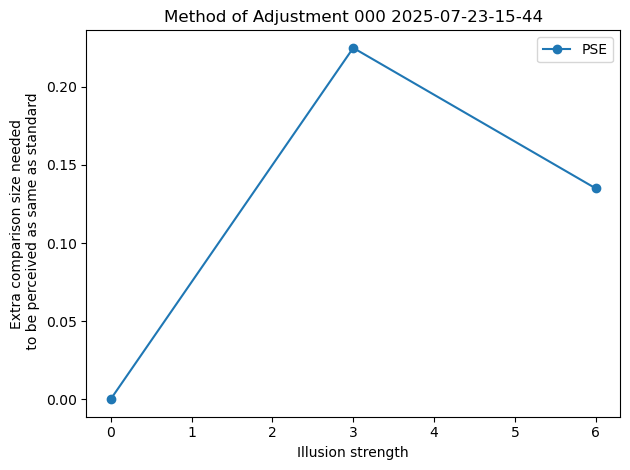

In [19]:
# plot, and save results and plot to files
pyllusion_lab.save_results_to_csv(adjustment_results_df, results_fname=results_adjustment_fname);
pyllusion_lab.plot_adjustment_results(adjustment_results_df, observer_ID, datetime_string, results_adjustment_fig_fname);

The Method of Adjustment is fast, easy and intuitive. We were able to quickly estimate the Point of Subjective (PSE) equality, so quickly that we redid it three times. A non-zero PSE basically means there is an illusion. The higher the PSE, the stronger the illusion. 

Some issues with Method of Adjustment:

1. The slider start position was randomized in the above experiment. How do you think the slider start position may bias the observer?
1. It is challenging to estimate the Just Noticeable Difference (JND) with this method. 
1. What else did you notice?

## 3. Method of Constant Stimuli

Next we will try to quantify your perception of the Ebbinghaus illusion using a more robust and controlled quantitative measurement technique: The method of constant stimuli. Instead of a slider, you will simply see the illusion and hit the up or down arrow. You will repeat this many times in many conditions to get enough measurements to estimate PSE and JND. Since this takes a little longer, we'll just run it at one illusion strength.

In [20]:
welcome_instructions = "In this experiment, you will see two red central circles, and be asked to judge whether the left or right central circle is bigger. Try to ignore the ring of black flanking circles"
trial_instructions="Which central red circle looked bigger (left or right)?"
illusion_strength_test = 6 # for here, we'll just test at one illusion strength
constantstimuli_results_df, get_results_fname = pyllusion_lab.pyllusion_constantstim_expt(
    illusion_type, illusion_strength=illusion_strength_test, differences=differences, num_trials_per_level=3, 
    standard=standard, duration=0.8, output_data_path=output_data_path + lab + "_", welcome_instructions=welcome_instructions, 
    trial_instructions=trial_instructions, stimuli_df=stimuli_df);

### Analyze Method of Constant Stimuli experiment results to estimate the PSE and JND

In [21]:
# let's just peak at the data to see its format
results_constantstim_fname = get_results_fname()
constantstimuli_results_df = pd.read_csv(results_constantstim_fname)
constantstimuli_results_df.head()

,trial,illusion_strength,standard,difference,response,RT,size1,size2,standard1,chooseComparison
0,1,6,0.15,1,1,5.736541,0.212132,0.150000,False,False
1,2,6,0.15,0,1,1.851903,0.150000,0.150000,True,True
2,3,6,0.15,-2,2,2.039594,0.150000,0.259808,True,True
3,4,6,0.15,-1,1,1.702440,0.150000,0.212132,True,True
4,5,6,0.15,2,1,1.534273,0.259808,0.150000,False,False


PSE (50% point): 0.50
JND (half 25–75 spread): 0.25
Saved figure to ../expt_results/lab1/lab1_Ebbinghaus_6_constant_stimuli_000_2025-07-23-15-51.jpg


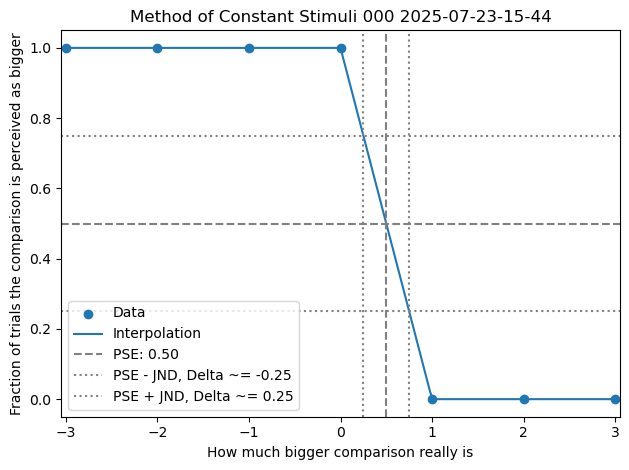

In [22]:
# plot the psychometric function, get PSE and JND
PSE, JND = pyllusion_lab.get_PSE_JND_constantstim_plot(observer_ID, datetime_string, results_constantstim_fname);

The vertical dashed central circle on the plot above indicates the Point of Subjective Equality (PSE). This is the size for the comparsion (arrows pointed out) which is, on average, perceived to be the same as the standard central circle (arrows pointed in). Because we used a non-zero illusion strength, the PSE is probably non-zero too. As before, a non-zero PSE basically means there is an illusion. The higher the abs(PSE), the stronger the illusion. 

The Just Noticeable Difference (JND) represents is the amount the size of the comparison must be changed in order it to be noticed about half the time. In the Goldstein et al (2008) reading, they call that the difference threshold. If the JND is very small, the observer is very senstive to small changes. If it is very large, then the observer won't notice substantial differences in the stimulus. A small JND implies that the illusion could break quite easily, whereas a large JND could imply that it is harder to break.

The next image will show the illusion at the PSE as well as one JND above and below. If the analysis is correct, you should perceive the left and right central circles to be perceived the same at the PSE. And it should be hard to notice the difference between the PSE and one JND above or below.

Ebbinghaus illusion with strength 6 at the PSE and one JND below and above. Can you perceive the difference? Probably not easily.


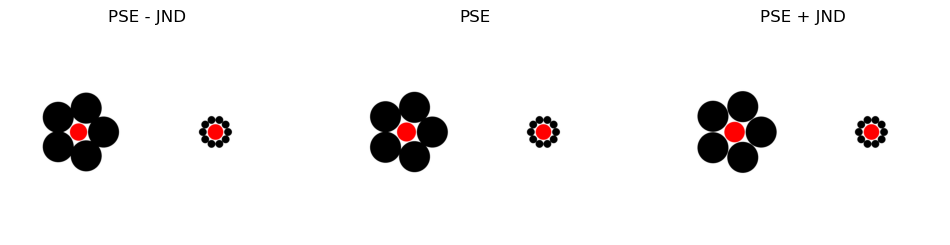

In [23]:
pyllusion_lab.plot_illusion_at_PSE_JND(illusion_type, PSE, JND, illusion_strength=illusion_strength_test, standard=standard)

## 4. Lab 1 Deliverables

If you've made it this far, you should now have an understanding of the factors that affect the Ebbinghaus illusion, and how to measure it using two methods: method of adjustment and method of constant stimuli. To complete lab 1: 

Click on the folder icon in the left left, and navigate to /expt_results/lab1/. 

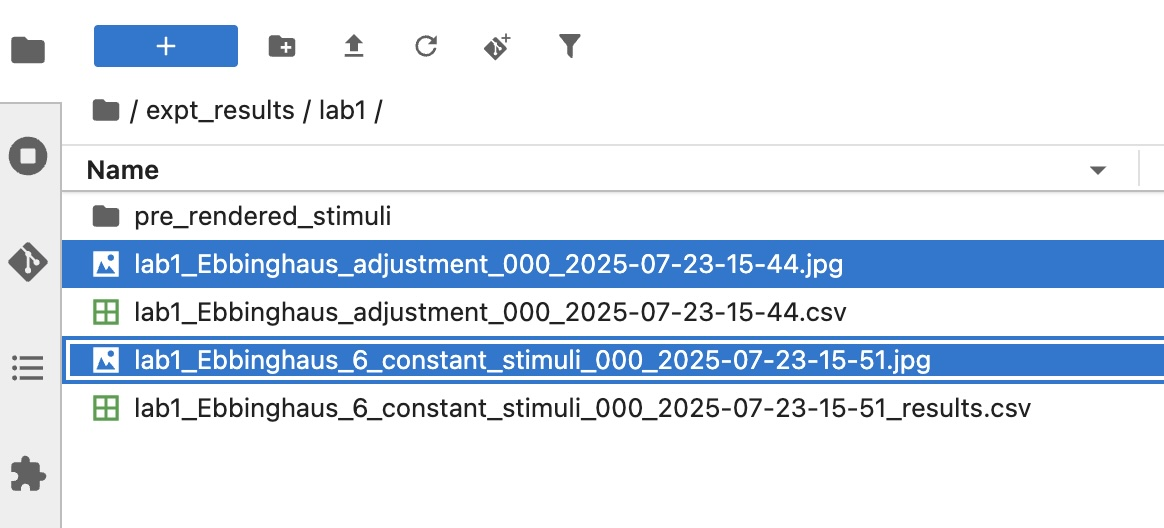

Select the two jpg figure files, and then right click to download them. 

1. lab1_Ebbinghaus_adjustment....jpg
1. lab1_Ebbinghaus_6_constant_stimuli....jpg

Now upload both files to bCourses and answer the questions in the [Lab 1 quiz](https://bcourses.berkeley.edu/courses/1544768/quizzes/2501025). Congrats on finishing lab 1!